### Import Libraries

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator



import os
import numpy as np
import matplotlib.pyplot as plt

### Use full Function

In [3]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

### Pre-processing

In [4]:
PATH = "./cats_and_dog/"

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')


total_train = sum([len(files) for r,d, files in os.walk(train_dir)])
total_val = sum([len(files) for r,d, files in os.walk(validation_dir)])
toral_test = sum([len(files) for r,d, files in os.walk(test_dir)])




In [5]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir,target_size = (IMG_HEIGHT,IMG_WIDTH), shuffle = True, class_mode = 'categorical')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,target_size = (IMG_HEIGHT,IMG_WIDTH), shuffle = True, class_mode = 'categorical')
test_data_gen = test_image_generator.flow_from_directory(test_dir,target_size = (IMG_HEIGHT,IMG_WIDTH), shuffle = False, class_mode=None)





Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


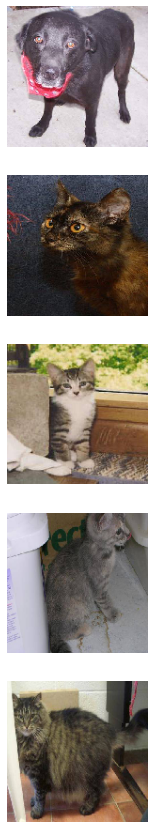

In [6]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [7]:
train_image_generator = ImageDataGenerator(rescale = 1./255, rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5)

Found 2000 images belonging to 2 classes.


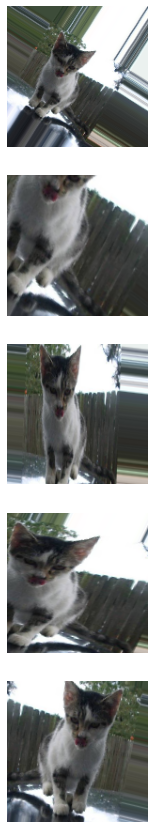

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

### Baseline Model 

In [9]:


model = Sequential()

model.add(Conv2D(32,3 ,activation = 'relu', padding ='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,3 ,activation = 'relu', padding ='same'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(128,3 ,activation = 'relu', padding ='same'))
model.add(MaxPooling2D(pool_size = (2,2)))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])


model.summary()

2022-06-13 15:58:45.786874: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [11]:
history=model.fit(train_data_gen,
                    validation_data=val_data_gen,
                    epochs = epochs,
                    verbose=2,
                    validation_steps=total_val // batch_size,
                    )

Epoch 1/15
16/16 - 69s - loss: 0.6149 - accuracy: 0.6605 - val_loss: 0.8320 - val_accuracy: 0.5000 - 69s/epoch - 4s/step
Epoch 2/15
16/16 - 64s - loss: 0.5963 - accuracy: 0.6795 - val_loss: 0.9365 - val_accuracy: 0.5000 - 64s/epoch - 4s/step
Epoch 3/15
16/16 - 61s - loss: 0.6102 - accuracy: 0.6755 - val_loss: 0.7803 - val_accuracy: 0.5000 - 61s/epoch - 4s/step
Epoch 4/15
16/16 - 62s - loss: 0.5948 - accuracy: 0.6935 - val_loss: 0.9104 - val_accuracy: 0.5000 - 62s/epoch - 4s/step
Epoch 5/15
16/16 - 68s - loss: 0.5878 - accuracy: 0.6840 - val_loss: 0.9919 - val_accuracy: 0.5000 - 68s/epoch - 4s/step
Epoch 6/15
16/16 - 82s - loss: 0.5898 - accuracy: 0.6800 - val_loss: 0.8426 - val_accuracy: 0.5000 - 82s/epoch - 5s/step
Epoch 7/15
16/16 - 80s - loss: 0.5741 - accuracy: 0.6945 - val_loss: 1.0201 - val_accuracy: 0.5000 - 80s/epoch - 5s/step
Epoch 8/15
16/16 - 69s - loss: 0.5912 - accuracy: 0.6840 - val_loss: 0.9622 - val_accuracy: 0.5000 - 69s/epoch - 4s/step
Epoch 9/15
16/16 - 61s - loss: 0

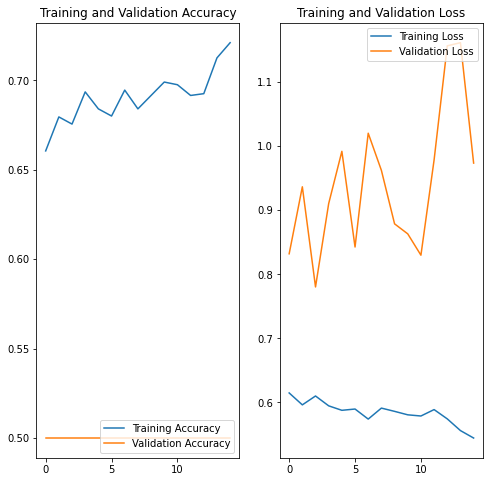

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predict Model 

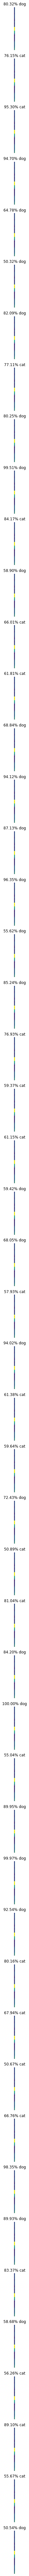

In [31]:
probability =model.predict(test_data_gen)
probabilities = [i[0] for i in probability]


plotImages([test_data_gen[0][0][0] for i in range(50)], probabilities=probabilities)

In [32]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.74% of the images of cats and dogs.
You passed the challenge!
